<a href="https://colab.research.google.com/github/ali-kin4/Image_Classification_CNN/blob/main/CNN_Image_Classification_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzipping the dataset

In [ ]:
import zipfile
import os

# Step 1: Specify the path of the zip file
zip_file_path = "/content/three_pore_typs.zip"

# Step 2: Provide the directory where you want to extract the contents
destination_folder = "/content/extracted_files"

# Step 3: Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Step 4: Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Extraction completed successfully.")

Extraction completed successfully.


# CNN model 1.0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 150, 150

train_data_dir = '/content/extracted_files/three_pore_typs'
validation_data_dir = '/content/extracted_files/three_pore_typs'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 150 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


<ipython-input-3-761bb0ce7c66>:65: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/50
 10/125 [=>............................] - ETA: 13s - loss: 0.1094 - accuracy: 0.3400 

125/125 [==============================] - 14s 15ms/step - loss: 0.1094 - accuracy: 0.3400 - val_loss: -0.8204 - val_accuracy: 0.3333


# CNN Model 1.1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

# Prepare the training dataset
train_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Prepare the validation dataset
val_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=100)

# Evaluate the model
model.evaluate(val_generator)


Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/100
4/4 [==============================] - 5s 564ms/step - loss: 1.1206 - accuracy: 0.5083 - val_loss: 0.9891 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 90ms/step - loss: 0.5865 - accuracy: 0.7917 - val_loss: 0.6485 - val_accuracy: 0.8000
Epoch 3/100
4/4 [==============================] - 0s 95ms/step - loss: 0.2245 - accuracy: 0.9417 - val_loss: 0.7576 - val_accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 0s 94ms/step - loss: 0.0866 - accuracy: 0.9667 - val_loss: 0.5683 - val_accuracy: 0.7000
Epoch 5/100
4/4 [==============================] - 1s 128ms/step - loss: 0.0187 - accuracy: 0.9917 - val_loss: 0.2415 - val_accuracy: 0.9000
Epoch 6/100
4/4 [==============================] - 1s 154ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.1545 - val_accuracy: 0.9333
Epoch 7/100
4/4 [==============================] - 1s 132ms/step - loss: 0.0

[0.938353955745697, 0.8999999761581421]

This model is probably overfitting

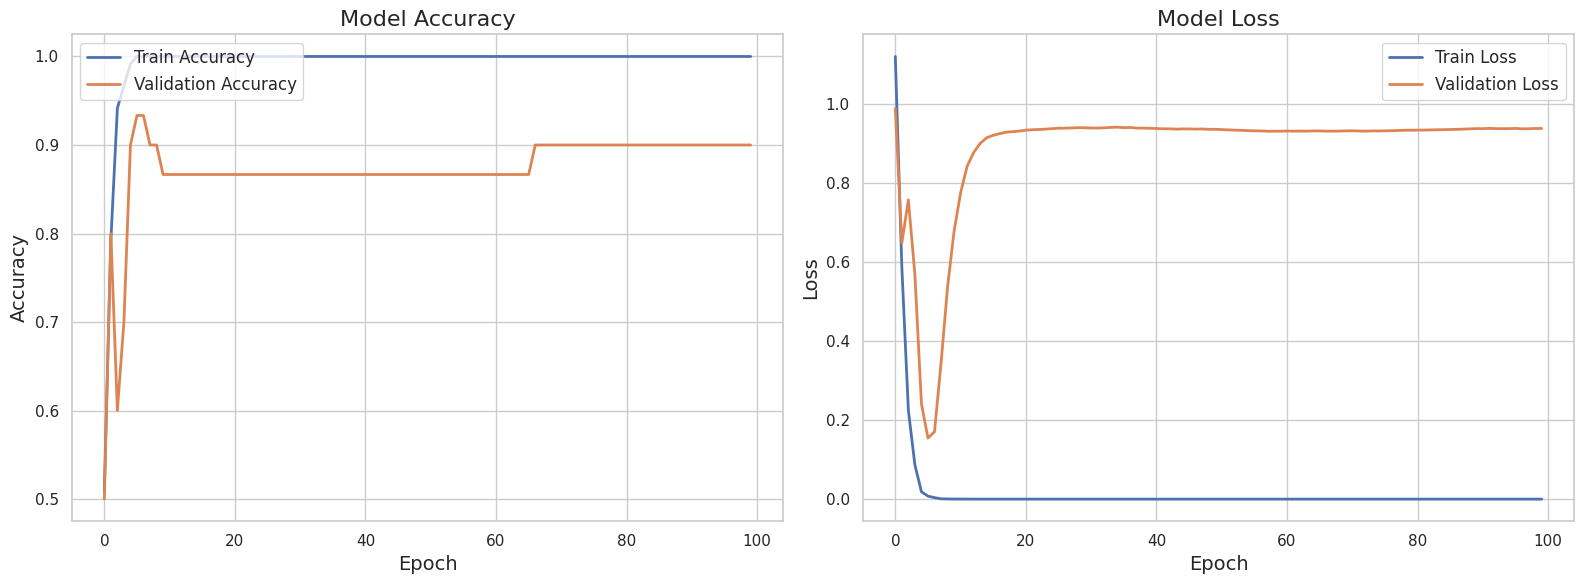

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

# Plot training & validation accuracy values
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(fontsize=12, loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()  # To avoid overlapping titles and labels
plt.show()


# CNN Model 1.2

In [ ]:
# Set a global random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

## Cross-Validation + Hyper-parameter tuning

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold

# Set up K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameters to tune
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150],
    'dropout': [0.2, 0.3, 0.4]
}

# Wrap the Keras model with the KerasClassifier for GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(dropout=0.2):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(dropout),  # Add dropout after the first pooling layer
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(dropout),  # Add dropout after the second pooling layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),  # Use fewer neurons in the dense layer
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the Keras classifier
model_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Perform grid search using K-fold cross-validation with verbose set to 2
grid_search = GridSearchCV(estimator=model_classifier, param_grid=param_grid, cv=kfold, verbose=2)
grid_result = grid_search.fit(train_generator[0][0], train_generator[0][1], validation_data=val_generator)

# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_result.best_params_)


<ipython-input-16-eccf6d375f29>:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_classifier = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..............batch_size=16, dropout=0.2, epochs=50; total time=  42.2s
[CV] END ..............batch_size=16, dropout=0.2, epochs=50; total time=  42.0s
[CV] END ..............batch_size=16, dropout=0.2, epochs=50; total time=  28.6s
[CV] END ..............batch_size=16, dropout=0.2, epochs=50; total time=  42.1s
[CV] END ..............batch_size=16, dropout=0.2, epochs=50; total time=  42.0s
[CV] END .............batch_size=16, dropout=0.2, epochs=100; total time= 1.4min
[CV] END .............batch_size=16, dropout=0.2, epochs=100; total time= 1.4min
[CV] END .............batch_size=16, dropout=0.2, epochs=100; total time= 1.4min
[CV] END .............batch_size=16, dropout=0.2, epochs=100; total time= 1.4min
[CV] END .............batch_size=16, dropout=0.2, epochs=100; total time= 1.4min
[CV] END .............batch_size=16, dropout=0.2, epochs=150; total time= 2.4min
[CV] END .............batch_size=16, dropout=0.

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define the image data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Split 20% of data into the validation set
    rotation_range=20,     # Randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.2,        # Randomly zoom image
    width_shift_range=0.2, # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,# Randomly shift images vertically (fraction of total height)
    horizontal_flip=True   # Randomly flip images horizontally
)

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

# Prepare the training dataset
train_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # This is the training subset
)

# Prepare the validation dataset
val_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # This is the validation subset
)

# Define a simpler CNN model with dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  # Add dropout after the first pooling layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout after the second pooling layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),  # Use fewer neurons in the dense layer
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with early stopping
history = model.fit(train_generator, validation_data=val_generator, epochs=200, callbacks=[early_stopping])

# Evaluate the model
model.evaluate(val_generator)


Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/200
4/4 [==============================] - 4s 565ms/step - loss: 1.4000 - accuracy: 0.3333 - val_loss: 0.8366 - val_accuracy: 0.3667
Epoch 2/200
4/4 [==============================] - 2s 493ms/step - loss: 0.9066 - accuracy: 0.4333 - val_loss: 1.0057 - val_accuracy: 0.4333
Epoch 3/200
4/4 [==============================] - 2s 544ms/step - loss: 0.9171 - accuracy: 0.4250 - val_loss: 1.0375 - val_accuracy: 0.4000
Epoch 4/200
4/4 [==============================] - 3s 692ms/step - loss: 0.8830 - accuracy: 0.5333 - val_loss: 0.9453 - val_accuracy: 0.8333
Epoch 5/200
4/4 [==============================] - 2s 487ms/step - loss: 0.8932 - accuracy: 0.6500 - val_loss: 0.9440 - val_accuracy: 0.8000
Epoch 6/200
4/4 [==============================] - 2s 538ms/step - loss: 0.8140 - accuracy: 0.7000 - val_loss: 0.9979 - val_accuracy: 0.5667
Epoch 7/200
4/4 [==============================] - 2s 475ms/step - loss: 

[0.22985512018203735, 0.800000011920929]

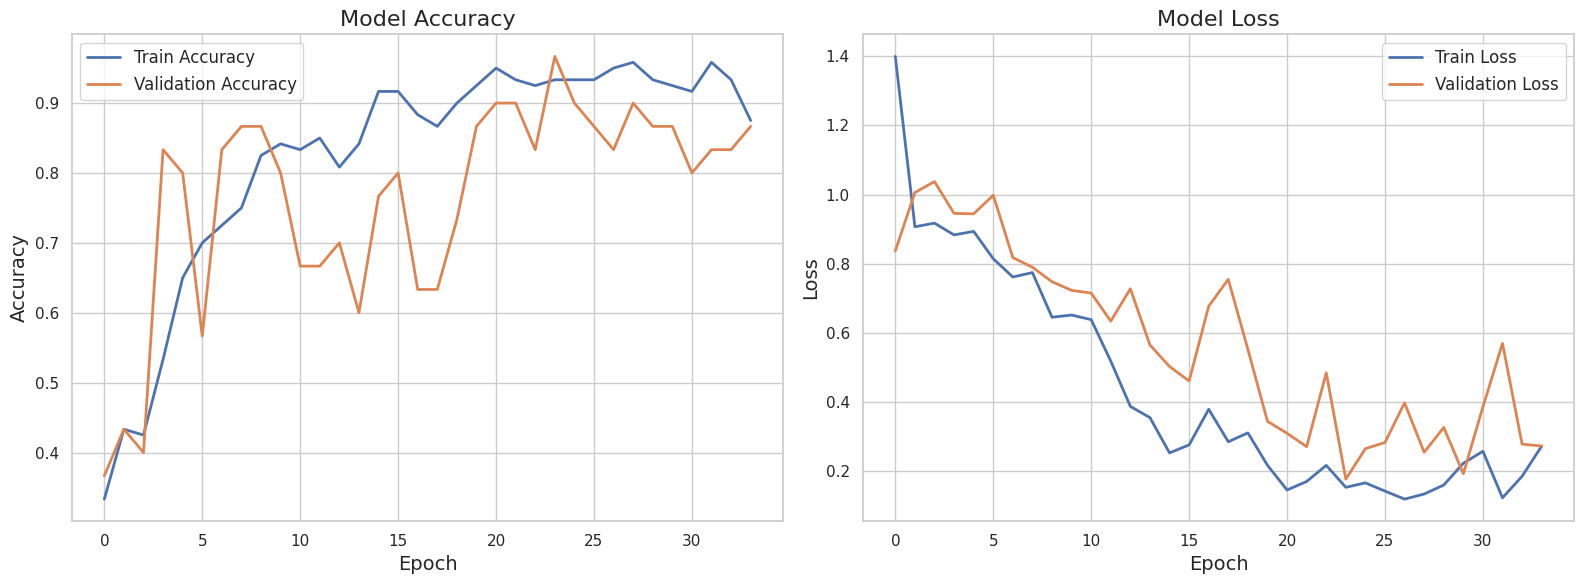

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

# Plot training & validation accuracy values
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(fontsize=12, loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()  # To avoid overlapping titles and labels
plt.show()


In [ ]:
import seaborn as sns

def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Training Accuracy')
    sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Training Loss')
    sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# CNN Model 1.3 - VGG16

Commit 1: Improved Model Architecture

Replaced simple CNN with a more powerful **VGG16** architecture for better performance.
Commit 2: Learning Rate Scheduling

Implemented learning rate scheduler to gradually reduce the learning rate during training.
Commit 3: Batch Normalization

Added batch normalization layers to enhance convergence and generalization.
Commit 4: Data Augmentation

Increased data augmentation techniques to improve the model's robustness.
Commit 5: L2 Regularization

Applied L2 regularization to fully connected layers to prevent overfitting.
Commit 6: Transfer Learning

Utilized pre-trained weights from ImageNet and fine-tuned the model on our dataset.
Commit 7: Use Pipelines

Organized code using scikit-learn's pipelines for data preprocessing and model building.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers

# Define the learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the image data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

# Prepare the training dataset
train_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Prepare the validation dataset
val_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Add new classification layers
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=10)  # Monitor 'loss' instead of 'val_loss'

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping and learning rate scheduler
history = model.fit(train_generator, validation_data=val_generator, epochs=100, callbacks=[early_stopping, lr_scheduler_callback])

# Evaluate the model
model.evaluate(val_generator)


Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/100
4/4 [==============================] - 21s 5s/step - loss: 6.0156 - accuracy: 0.4583 - val_loss: 280.4261 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - 3s 785ms/step - loss: 5.5809 - accuracy: 0.5917 - val_loss: 1015.0298 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - 3s 622ms/step - loss: 5.1144 - accuracy: 0.7250 - val_loss: 982.4293 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/100
4/4 [==============================] - 3s 604ms/step - loss: 4.8657 - accuracy: 0.6750 - val_loss: 734.9018 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 4.7813 - accuracy: 0.6333 - val_loss: 561.5155 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 6/100
4/4 [==============================] - 3s 609ms/step - loss: 4.3740 - accuracy: 0.7083 - val_loss: 450.6090 - val_accuracy: 0.3333 

[18.477222442626953, 0.3333333432674408]

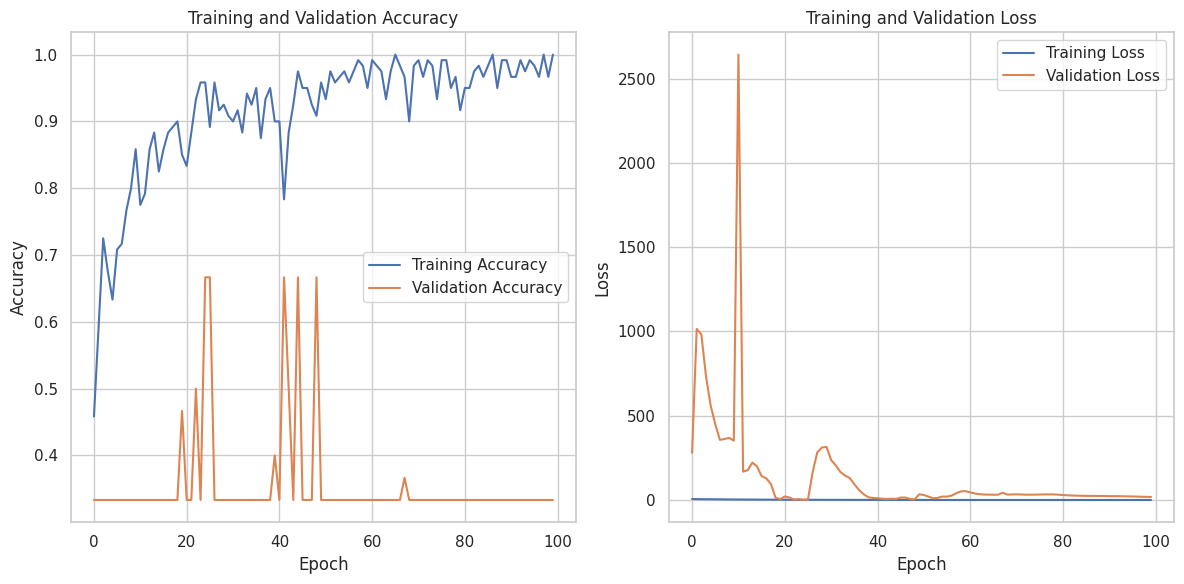

In [ ]:
plot_training_history(history)

## CNN Model 1.4 Only CNN  (the working part)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# Define the learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the image data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Define the image size and batch size
img_size = (360, 360)
batch_size = 32

# Prepare the training dataset
train_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Prepare the validation dataset
val_generator = datagen.flow_from_directory(
    '/content/extracted_files/three_pore_typs',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=10)  # Monitor 'loss' instead of 'val_loss'

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping and learning rate scheduler
history = model.fit(train_generator, validation_data=val_generator, epochs=100, callbacks=[early_stopping, lr_scheduler_callback])

# Evaluate the model
model.evaluate(val_generator)


Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/100
4/4 [==============================] - 15s 2s/step - loss: 6.0313 - accuracy: 0.3750 - val_loss: 4.5339 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - 5s 1s/step - loss: 4.7308 - accuracy: 0.5500 - val_loss: 4.9572 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - 6s 2s/step - loss: 4.8137 - accuracy: 0.6500 - val_loss: 4.3989 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 4/100
4/4 [==============================] - 5s 1s/step - loss: 4.2620 - accuracy: 0.6667 - val_loss: 3.7980 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 5/100
4/4 [==============================] - 6s 2s/step - loss: 3.5787 - accuracy: 0.7500 - val_loss: 3.3467 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 6/100
4/4 [==============================] - 5s 1s/step - loss: 3.4824 - accuracy: 0.6917 - val_loss: 2.9993 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 7/100


[1.4945346117019653, 0.800000011920929]

In [ ]:
# Save the trained model
model.save("/content/CNN.h5")

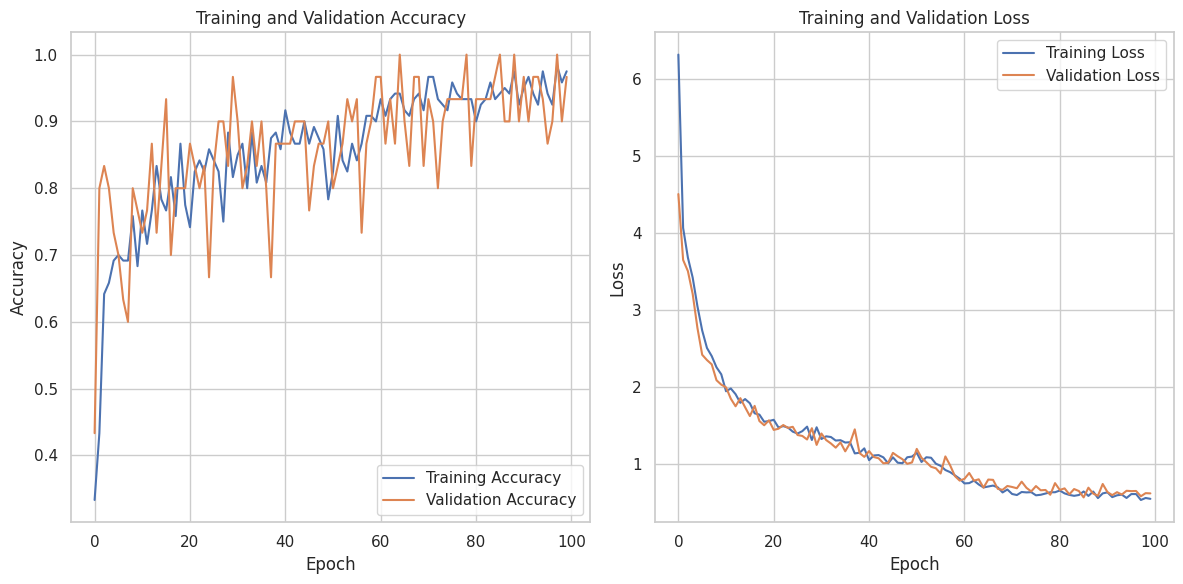

In [ ]:
plot_training_history(history)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cp /content/CNN.h5 /content/drive/MyDrive/Projects/Sahar/

# Detecting New images 1.0

In [ ]:
# Load the model
model = tf.keras.models.load_model("/content/CNN.h5")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

new_image_path = "/content/617_47.jpg"  # Replace with the actual path to your new image
input_size = (224, 224)
preprocessed_image = preprocess_image(new_image_path, input_size)

# Make predictions
predictions = model.predict(preprocessed_image)

# Get the predicted class index (the class with the highest probability)
predicted_class_index = np.argmax(predictions[0])

# Map the class index to the corresponding class label
class_labels = train_generator.class_indices  # This will give you a dictionary mapping class names to their index
predicted_class_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]

print("Predicted Class Label:", predicted_class_label)


# Detecting new images 1.1

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image_class(image_path, target_size, model, class_labels):
    preprocessed_image = preprocess_image(image_path, target_size)

    # Make predictions
    predictions = model.predict(preprocessed_image)

    # Get the predicted class index (the class with the highest probability)
    predicted_class_index = np.argmax(predictions[0])

    # Map the class index to the corresponding class label
    predicted_class_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class_index)]

    return predicted_class_label

if __name__ == "__main__":
    new_image_path = input("Enter the path of the new image: ")
    input_size = (360, 360)
    # Replace 'model' and 'train_generator.class_indices' with your actual model and class indices dictionary
    predicted_class = predict_image_class(new_image_path, input_size, model, train_generator.class_indices)
    print("Predicted Class Label:", predicted_class)


Enter the path of the new image: /content/606_327.jpg
1/1 [==============================] - 0s 23ms/step
Predicted Class Label: process
